<h1>Homework 2</h1>

#### Bayes' theorem:
\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posterior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

# Question 1
### Read the following example and complete the exercises 

You are at the age of 21 and curious about if drinking alcohol would cause liver disease. You contacted a clinic site and got the following information.

1. Past data tells you that 10% of patients entering the clinic have liver disease (**Prior**). 

2. Five percent of the clinic’s patients are alcoholics (**Marginal Probability**). 

3. Among the patients diagnosed with liver disease, 15% are alcoholics (**Likelihood**). 

Now you wonder what is the probability of a patient from the clinic have liver disease given that the patient is alcoholic (**Posterior**)

### 1.1 

#### If A represents the event of being an alcoholic patient in the clinic and L represents the event of being a patient with liver disease in the clinic, write the bayesian representation (P(A|B)) in the following cells


Posterior = P(LiverDisease|Alcoholic) = P(L|A)

Prior = P(LiverDisease) = P(L) = 0.05 

Likelihood = P(Alcoholic|LiverDisease) = P(A|L) = 0.15

Marginal Probability = P(Alcoholic)= P(A) = 0.10

### 1.2 

#### Define all the information available and calculate the posterior probability

In [10]:
# Set Vars and Knowns
P_AgivenL = 0.15  # Likelihood: Probability of being alcoholic given liver disease
P_L = 0.10  # Prior: Probability of having liver disease
P_A = 0.05  # Marginal Probability: Probability of being alcoholic


# Bayes Theorem for Posterior
P_LgivenA = (P_AgivenL * P_L) / P_A

println("Probability of having Liver Disease given the patient is an Alcoholic: ", P_LgivenA)


Probability of having Liver Disease given the patient is an Alcoholic: 0.3


# Question 2
### Read the following example and complete the exercises 
Shown by a <a href="https://pubmed.ncbi.nlm.nih.gov/34242764/#:~:text=The%20overall%20sensitivity%20of%20the,%25%20CI%2024.4%2D65.1">reaserch study</a>, the rapid antigen test for Covid has a sensitivity of 65.3% and a specificity of 99.9%. Assume 1% people have Covid. If randomly select a person and he/she tests positive using the rapid antigen test, what is the probability the person has Covid (posterior).

### 2.1 

#### The probability of which event is considered marginal probability in this case? Define it in the first cell below and calculate it in the second cell below

The event is: 

In [18]:
# Setting variables, do not compute
# Vars, treat COVID (+) and Healthy (-)
P_COVID = 0.01  # Prior: Probability of having COVID
P_Healthy = 1 - P_COVID  # Probability of not having COVID AKA "Healthy"
P_POSgivenCOVID = 0.653  # Sensitivity: Probability of testing positive given COVID (True Positive)
P_NEGgivenHealthy = 0.999  # Specificity: Probability of testing negative given no COVID (True Negative)
P_POSgivenHealthy = 1 - P_NEGgivenHealthy;  # False Positive Rate



In [22]:
# Compute marginal probability of testing positive
# Refer to Eqn: P(A) = P(B|A)P(A)+ P(A|B^-1)P(B^-1) 
# A is COVID, B is positive with COVID, B^-1 is Healthy or not COVID

P_Positive = (P_POSgivenCOVID * P_COVID) + (P_POSgivenHealthy * P_Healthy)
println("Probability of having a positive COVID test: ", P_Positive*100 ," %")

Probability of having a positive COVID test: 0.7520000000000001 %


### 2.2 

#### Define all the information and calculate the probability the randomly selected person has Covid

In [23]:
# Bayes' Theorem to find posterior probability P(A|B)= P(B|A)P(A)/P(B)
P_COVIDgivenPOS = (P_POSgivenCOVID * P_COVID) / P_Positive

# Display result
println("Probability of having COVID given a positive test: ", P_COVIDgivenPOS*100 ," %")


Probability of having COVID given a positive test: 86.83510638297872 %


# Question 3
### <a href="https://juliastats.org/Distributions.jl/stable/starting/">This page</a> is the documentation for Distribution.jl and complete the exercies

### 3.1 

#### Randomly draw 1000 samples from a normal distribution with mean = 5 and std = 2

In [28]:
# https://juliastats.org/Distributions.jl/stable/starting/

using Random, Distributions, Plots

distribution = Normal(5, 2) # mean 5, std 2
samples = rand(distribution, 1000) #N=1000 at random displacements

1000-element Vector{Float64}:
 5.354604554281758
 6.702318071461885
 3.86829641139947
 7.5257296723327185
 7.013054975645664
 6.303853773085051
 3.994574296110681
 9.500728792666074
 7.5326444960771415
 4.134067284444421
 2.409748134529588
 3.827587848656277
 4.602919953663911
 ⋮
 5.463549609569162
 5.834492183330656
 5.8886698064716985
 3.513039374125773
 1.2454944077256251
 2.717935823559268
 1.7628248945830696
 5.152720246189063
 5.378910605502652
 4.2671120103541895
 3.634766116062676
 7.114528227785659

### 3.2

#### Plot  the distribution above in a histogram

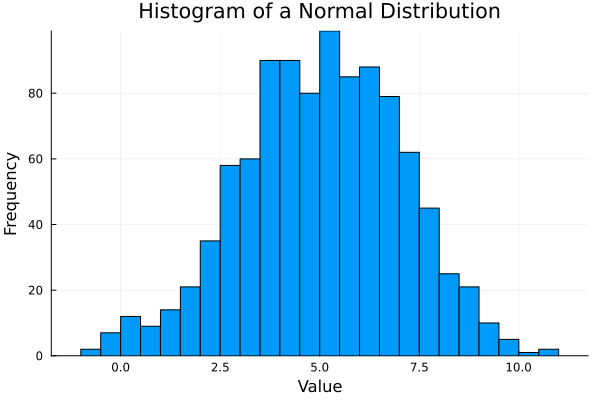

In [25]:
histogram(samples, bins=30, title="Histogram of a Normal Distribution", xlabel="Value", ylabel="Frequency", legend=false)

### 3.3

#### Plot  the same distribution and change the bins to 50

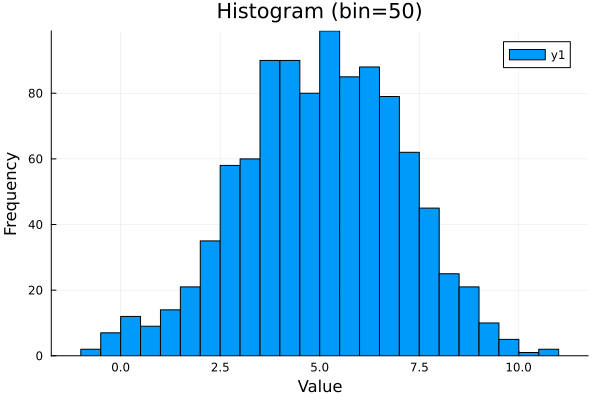

In [27]:
histogram(samples, bins=50, title="Histogram (bin=50)", xlabel="Value", ylabel="Frequency", legend=true)

### 3.4 

#### Choose a distribution other than normal distribution, Describe what it represents, and draw 1000 samples from the distribution and plot it using parameters of your choice

Which distribution do you pick: ::Exponential Distribution

What does the distribution represent? :: Duration between events of probabilities (waiting time for bus, train, person meeting the next person) 

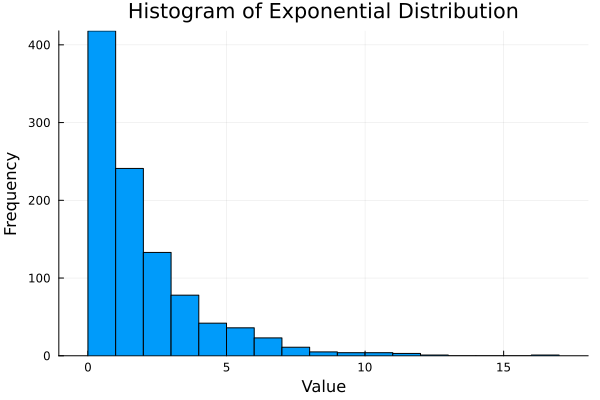

In [29]:
#Exponential Distribution
exp_dist = Exponential(2.0)  # Rate parameter lambda = 2.0
exp_samples = rand(exp_dist, 1000)
histogram(exp_samples, bins=30, title="Histogram of Exponential Distribution", xlabel="Value", ylabel="Frequency", legend=false)

### 3.5

#### Plot  the two distributions in the same plot

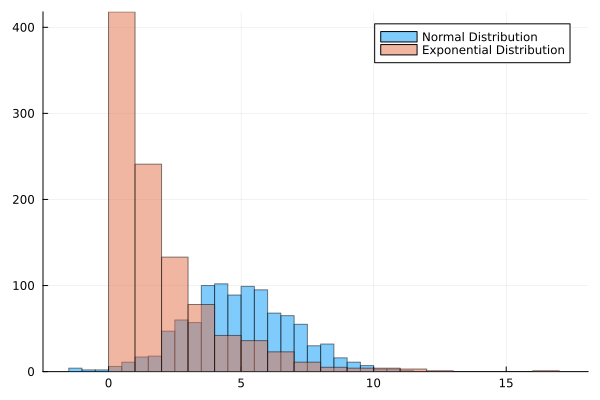

In [30]:
# Norm Dist
histogram(samples, bins=30, alpha=0.5, label="Normal Distribution")
# Exp Dist
histogram!(exp_samples, bins=30, alpha=0.5, label="Exponential Distribution")

### 3.6

#### Draw 10000 samples from the two distributions separately and plot them in the same plot

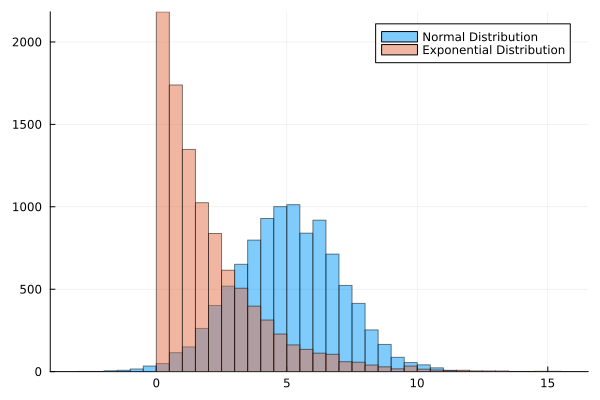

In [38]:
# Dist Set up 
exp_dist = Exponential(2.0)  # Rate parameter lambda = 2.0
norm_dist = Normal(5, 2) # mean 5, std 2

# Samples for Dists
large_samples_norm = rand(norm_dist, 10000)
large_samples_exp = rand(exp_dist, 10000)

# Plot
histogram(large_samples_norm, bins=50, alpha=0.5, label="Normal Distribution")
histogram!(large_samples_exp, bins=50, alpha=0.5, label="Exponential Distribution")